### Setting up the data (10 points)

The following is the snippet of code to load the datasets, and split it into train and validation data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

def print_info(X, name):
    for i in range(X.shape[1]):
        print(i + 1)
        print(name + " min is:", np.min(X[:, i]), name + " max is:", np.max(X[:, i]))
        print(name + " mean is:",np.mean(X[:,i]), name + " variance is:",np.var(X[:,i]))


In [2]:
# 1.1 Print the minimum, maximum, mean, and the variance of all of the features.
print_info(X, '')

1
 min is: 193.5  max is: 253.0
 mean is: 241.6011037  variance is: 83.4991711498463
2
 min is: 152.5  max is: 249.0
 mean is: 227.3765713  variance is: 92.62559312501634
3
 min is: 214.25  max is: 252.5
 mean is: 241.55415049999996  variance is: 35.28633980334975
4
 min is: 152.5  max is: 252.5
 mean is: 232.82676815000002  variance is: 97.62573174864559
5
 min is: 10.0  max is: 31048.0
 mean is: 3089.923365  variance is: 15651513.756432075
6
 min is: 0.0  max is: 13630.0
 mean is: 928.25902  variance is: 3081761.81694864
7
 min is: 0.0  max is: 9238.0
 mean is: 138.09383  variance is: 443951.74644593126
8
 min is: 0.0  max is: 125.17
 mean is: 3.2485793303  variance is: 8.2194850249125
9
 min is: 0.87589  max is: 19.167
 mean is: 6.49865290275  variance is: 6.405048191357353
10
 min is: 0.0  max is: 13.23
 mean is: 2.09713912048  variance is: 4.36344047061341
11
 min is: 0.0  max is: 66.761
 mean is: 4.21766040935  variance is: 4.086371884226909
12
 min is: 0.0  max is: 73.902
 mean 

In [3]:
# 1.2
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
Xv, Yv = Xva[:5000], Yva[:5000]
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xv, params) # Normalize the features

print('---XtS-----')

print_info(XtS, 'XtS')

print('---XvS-----')

print_info(XvS, 'XvS')

---XtS-----
1
XtS min is: -4.53664112139335 XtS max is: 1.256506084095033
XtS mean is: -5.088196530778077e-15 XtS variance is: 1.0000000000000024
2
XtS min is: -7.789940446050521 XtS max is: 1.6671143539860802
XtS mean is: -2.6410873488202922e-15 XtS variance is: 0.9999999999999934
3
XtS min is: -4.4831888345715125 XtS max is: 1.7126613106146114
XtS mean is: -3.0038904696993994e-14 XtS variance is: 1.0000000000000073
4
XtS min is: -8.076837360369813 XtS max is: 1.8837297578721888
XtS mean is: -3.4006575333478397e-15 XtS variance is: 0.9999999999999962
5
XtS min is: -0.7739423810136816 XtS max is: 7.027112223620278
XtS mean is: -3.907985046680551e-18 XtS variance is: 0.9999999999999992
6
XtS min is: -0.5399631986420367 XtS max is: 7.581086893397685
XtS mean is: 3.1974423109204507e-18 XtS variance is: 1.0000000000000044
7
XtS min is: -0.20991442765341914 XtS max is: 14.881688508674536
XtS mean is: 1.4566126083082055e-17 XtS variance is: 1.0000000000000742
8
XtS min is: -0.968339504998590

### Linear Classifiers (20 points)

In [4]:
def linear_classfier_print(learner, XtS, Yt, XvS, Yv):
    reg = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0] 
    tr_auc = []
    va_auc = []
    for r in reg:
        learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))

    plt.plot(reg, tr_auc)
    plt.xlabel('reg')
    plt.ylabel('train')

    plt.plot(reg, va_auc)
    plt.xlabel('reg')
    plt.ylabel('validation')

    plt.show()

/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


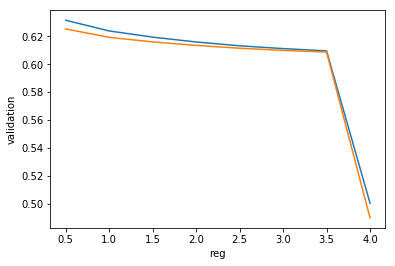

In [5]:
# 2.1
learner = ml.linearC.linearClassify()
linear_classfier_print(learner, XtS, Yt, XvS, Yv)

In [6]:
# 2.2
Xt2 = ml.transforms.fpoly(Xt, 2, bias=False)
Xv2 = ml.transforms.fpoly(Xv, 2, bias=False)
print(Xt2.shape[1])

# We originally have 14 features from x1 -> x14
# we pick 2 different from them to combine a new xi * xj feature, it will be 14 * 13 / 2 -> 91
# we convert every feature to its square  x1 -> x1 * x1 , it will be 14

# so, totally 14 + 14 + 91 = 119

119


/home/zhangjitao0405/uci-cs273/HW4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


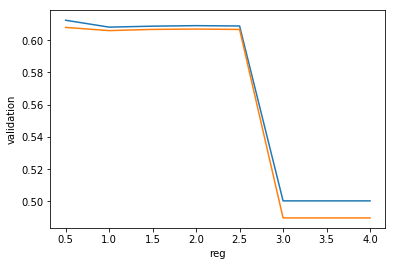

In [7]:
# 2.3
XtS2, params = ml.rescale(Xt2)
XvS2, _ = ml.rescale(Xv2, params)
learner_trans = ml.linearC.linearClassify()
linear_classfier_print(learner_trans, XtS2, Yt, XvS2, Yv)

###  Nearest Neighbors (20 points)

In [8]:
def nearest_neighbors_print(XtS, Yt, XvS, Yv):
    klist = [1, 5, 10, 50, 100, 200, 400] 
    tr_auc = []
    va_auc = []
    for k in klist:
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=0.0)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))

    plt.plot(klist, tr_auc)
    plt.xlabel('k')
    plt.ylabel('train')

    plt.plot(klist, va_auc)
    plt.xlabel('k')
    plt.ylabel('validation')

    plt.show()

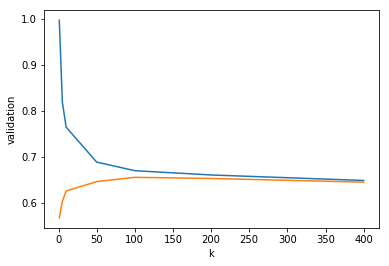

In [9]:
# 3.1
nearest_neighbors_print(XtS, Yt, XvS, Yv)

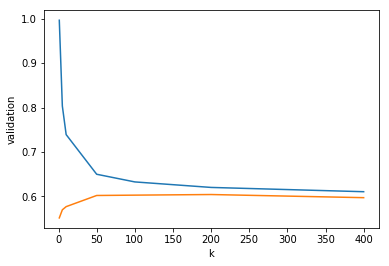

In [10]:
# 3.2
nearest_neighbors_print(Xt, Yt, Xv, Yv)

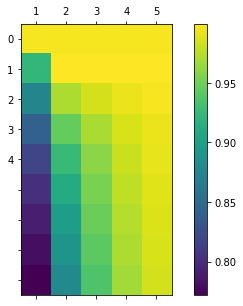

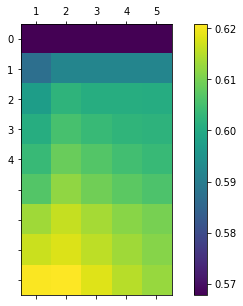

In [11]:
# 3.3
K = range(1,10,1) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)  # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yv)
        

# training AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(K))
ax.set_yticklabels(['']+list(A))
plt.show()

# validation AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(K))
ax.set_yticklabels(['']+list(A))
plt.show()

nothing

### Decision Trees (20 points)

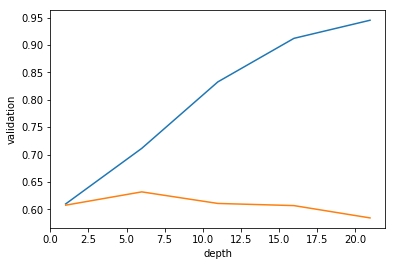

In [14]:
# 4.1
depths = range(1,25, 5)
tr_auc = []
va_auc = []

for d in depths:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=d)
    learner.train(XtS, Yt, minParent=2, maxDepth=d, minLeaf=1, nFeatures=None)
    tr_auc.append(learner.auc(XtS, Yt))
    va_auc.append(learner.auc(XvS, Yv))

plt.plot(depths, tr_auc)
plt.xlabel('depth')
plt.ylabel('train')

plt.plot(depths, va_auc)
plt.xlabel('depth')
plt.ylabel('validation')

plt.show()

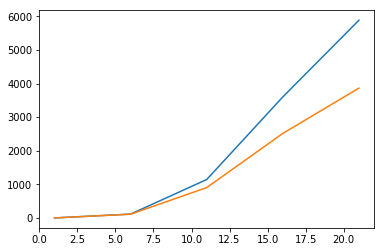

In [15]:
# 4.2
node1 = []
node2 = []

for d in depths:
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=d)
    learner.train(XtS, Yt, minParent=2, maxDepth=d, minLeaf=1, nFeatures=None)
    node1.append(learner.sz)
    
    learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=d)
    learner.train(XtS, Yt, minParent=4, maxDepth=d, minLeaf=1, nFeatures=None)
    node2.append(learner.sz)

plt.plot(depths, node1)
plt.plot(depths, node2)
plt.show()

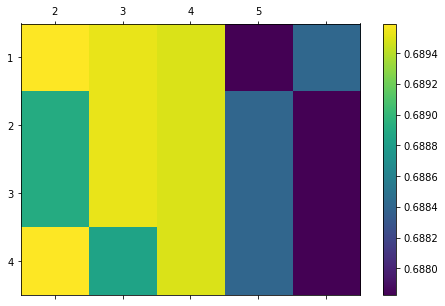

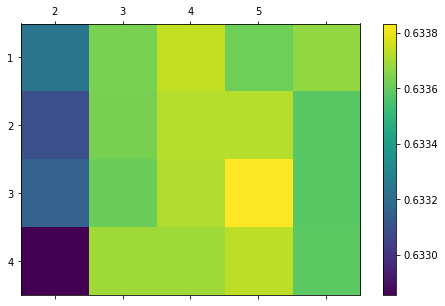

In [16]:
# 4.3
minLeaves = range(1,6)
minParents = range(2,6)

tr_auc = np.zeros((len(minParents),len(minLeaves)))
va_auc = np.zeros((len(minParents),len(minLeaves)))
for i,p in enumerate(minParents):
    for j,l in enumerate(minLeaves):
        learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=5)
        learner.train(XtS, Yt, minParent=p, maxDepth=5, minLeaf=l, nFeatures=None)
        tr_auc[i][j] = learner.auc(XtS, Yt)  # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yv)
        

# Plotting the Test AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(minParents))
ax.set_yticklabels(['']+list(minLeaves))
plt.show()

# Plotting the Validation AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(minParents))
ax.set_yticklabels(['']+list(minLeaves))
plt.show()

### Neural Networks (20 points)

it 1 : Jsur = 0.43429344162464406, J01 = 0.3538
it 2 : Jsur = 0.4330062383902595, J01 = 0.3538
it 4 : Jsur = 0.43155188428395286, J01 = 0.3538
it 8 : Jsur = 0.43038112394157696, J01 = 0.3538
it 16 : Jsur = 0.4302573483003698, J01 = 0.3538
it 32 : Jsur = 0.4304564624124494, J01 = 0.3538
it 64 : Jsur = 0.4307570153393277, J01 = 0.3538
it 128 : Jsur = 0.43109376925902926, J01 = 0.3538
it 256 : Jsur = 0.4313169226746549, J01 = 0.3538
it 1 : Jsur = 0.45725489985459916, J01 = 0.3538
it 2 : Jsur = 0.4578374184089932, J01 = 0.3538
it 4 : Jsur = 0.457730134031695, J01 = 0.3538
it 8 : Jsur = 0.4573005735501798, J01 = 0.3538
it 16 : Jsur = 0.45725214042768314, J01 = 0.3538
it 1 : Jsur = 0.45725489984339074, J01 = 0.3538
it 2 : Jsur = 0.45783741839285375, J01 = 0.3538
it 4 : Jsur = 0.4577301340522072, J01 = 0.3538
it 8 : Jsur = 0.45730057354138454, J01 = 0.3538
it 16 : Jsur = 0.4572521404248413, J01 = 0.3538
it 1 : Jsur = 0.4572548998594194, J01 = 0.3538
it 2 : Jsur = 0.45783741841438613, J01 = 0.

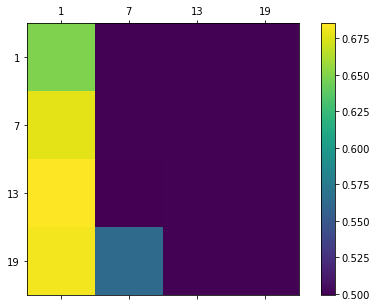

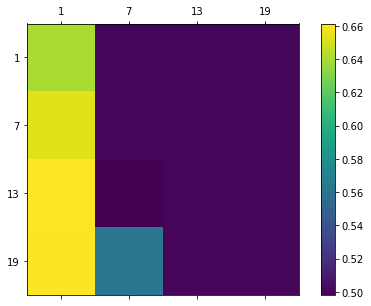

In [17]:
# 5.1
nodes = range(1,20,6)
layers = range(1,20,6)
tr_auc = np.zeros((len(nodes),len(layers)))
va_auc = np.zeros((len(nodes),len(layers)))
for i,node in enumerate(nodes):
    for j,layer in enumerate(layers):
        nn = ml.nnet.nnetClassify()
        size = [XtS.shape[1]] + [node for x in range(1,layer+1)] + [len(np.unique(Yt))]
        nn.init_weights(size, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yv)

# Plotting the Test AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(nodes))
ax.set_yticklabels(['']+list(layers))
plt.show()

# Plotting the Validation AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(nodes))
ax.set_yticklabels(['']+list(layers))
plt.show()

In [ ]:
# 5.2
def sig(z): return np.atleast_2d(z)
def dsig(z): return np.atleast_2d(1)

tr_auc = np.zeros((len(nodes),len(layers)))
va_auc = np.zeros((len(nodes),len(layers)))
for i,node in enumerate(nodes):
    for j,layer in enumerate(layers):
        nn = ml.nnet.nnetClassify()
        size = [XtS.shape[1]] + [node for x in range(1,layer+1)] + [len(np.unique(Yt))]
        nn.setActivation('custom', sig, dsig)
        nn.init_weights(size, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yva)

# Plotting the Test AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(minParents))
ax.set_yticklabels(['']+list(minLeaves))
plt.show()

# Plotting the Validation AUC Data
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(minParents))
ax.set_yticklabels(['']+list(minLeaves))
plt.show()

### Conclusions (5 points)

In [ ]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
learner = .. # train one using X,Y
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

### Statement of Collaboration (5 points)